In [4]:
from PIL import Image

def get_image(image_path):
    '''Function that grabs our .jpg and resizes it to 100,100'''
    image = Image.open(str(image_path) + ".jpg")
    image = image.resize((100,100))
    return np.array(image)

def create_features(img):
    '''Function that takes the RGB values turns it into a 1D array'''
    # Flatten three channel color image
    color_features = np.array(img).flatten()
    return color_features

def create_feature_matrix(image_list):
    '''Create an array of pixel information from the list of images provided.'''
    matrix = []
    for i in image_list:
        image = get_image(i)
        color_features = create_features(image)
        matrix.append(color_features)
    return matrix

import pandas as pd

# If you don't have a Pokedex, use a list of numbers instead. E.g.:
# images = list(range(1,899))

# Import our Pokedex
images = pd.read_csv("Full Pokedex.csv", index_col = 0)

# We're really only interested in the names of the pokemon here
# So drop everything except the Pokemon's name
images_truncated = images.drop(images.loc[:,"type1":], axis = 1)

# Here, we only use the first 5 elements of the index just as an example. In reality, we'd
# use all of the pokemon. We also need a +1, since the index of our dataframe starts from 0, 
# but my Bulbasaur image starts from 1.
feature_matrix = create_feature_matrix(images_truncated.index[:5] + 1)

# Combine our Pokedex (or what's left of it) with the new colour data
# Remember, we only looked at the colour data of the first 5 pokemon, so truncate your 
# dataframe appropriately.
feature_df = pd.concat([images_truncated.iloc[:5,:], pd.DataFrame(feature_matrix)], axis = 1)

display(feature_df)

In [22]:
import pandas as pd

# If you don't have a Pokedex, use a list of numbers instead. E.g.:
# images = list(range(1,899))

# Import our Pokedex
images = pd.read_csv("Full Pokedex.csv", index_col = 0)

# We're really only interested in the names of the pokemon here
# So drop everything except the Pokemon's name
images_truncated = images.drop(images.loc[:,"type1":], axis = 1)

# Here, we only use the first 5 elements of the index just as an example. In reality, we'd
# use all of the pokemon. We also need a +1, since the index of our dataframe starts from 0, 
# but my Bulbasaur image starts from 1.
feature_matrix = create_feature_matrix(images_truncated.index + 1)

# Combine our Pokedex (or what's left of it) with the new colour data
# Remember, we only looked at the colour data of the first 5 pokemon, so truncate your 
# dataframe appropriately.
feature_df = pd.concat([images_truncated, pd.DataFrame(feature_matrix)], axis = 1)

display(feature_df)

,name,0,1,2,3,4,5,6,7,8,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,Bulbasaur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ivysaur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Venusaur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Charmander,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charmeleon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,Regidrago,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,Glastrier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,Spectrier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object.
scaler = StandardScaler()

# Choose the final number of columns we want.
pca = PCA(n_components = 500)

# Fit the data to our scaler and PCA models, then transform the data into the scaled and
# dimensionally reduced matrices, respectively.
scaled_df = scaler.fit_transform(feature_df.iloc[:, 1:])
pca_df = pca.fit_transform(scaled_df)

print(f"500 columns can express {pca.explained_variance_ratio_.sum()*100:.2f}% of the variance in our data.")

500 columns can express 95.95% of the variance in our data.


In [25]:
pca_matrix = pd.concat([feature_df["name"], pd.DataFrame(pca_df)], axis = 1)

pca_matrix

,name,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,Bulbasaur,82.923338,50.459149,12.318535,-3.836703,35.626747,-18.382086,-10.600746,-5.201186,-4.020729,...,-0.347932,1.876122,-0.916546,0.905250,0.218601,0.752705,-2.378241,-0.525271,-1.102130,4.038195
1,Ivysaur,49.794881,20.703526,1.380003,6.304401,18.365689,-10.440510,-21.818646,19.141903,13.868517,...,-2.076998,-1.980751,-1.449762,7.683878,-4.079938,2.875187,2.493465,-1.518714,-2.423894,2.969016
2,Venusaur,2.372400,17.513624,-6.525662,0.511793,-4.199778,6.518569,-10.854654,-7.628833,10.071999,...,-0.453237,1.005295,1.343724,0.833941,-3.218811,-4.237435,-0.045136,-1.440269,2.415660,-0.413181
3,Charmander,28.205655,-31.944852,62.197702,-50.215226,-32.185347,-1.341427,25.125965,-23.705557,7.828244,...,-0.080156,3.065965,3.123883,3.357524,-0.827267,-3.738251,-8.445150,-0.583483,0.244927,-1.315418
4,Charmeleon,-8.438778,-22.068894,11.737068,-39.087518,-7.792622,10.069978,5.521530,-19.420486,16.201498,...,-5.053516,-0.222619,-2.744075,-1.365793,0.145497,0.402845,1.417907,-0.190372,-5.011853,-0.341793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,-49.803188,76.514008,-10.864754,37.979668,-15.954825,-0.462988,-11.343852,-53.151713,-4.067384,...,-0.195262,0.106740,-0.059107,0.166770,0.179426,0.089123,-0.140331,-0.149790,0.119372,-0.047733
894,Regidrago,-58.323402,19.337643,23.296750,-25.971737,9.449640,-3.283176,3.883736,-2.902978,-1.042342,...,-1.423288,0.101740,1.751499,1.336774,-2.345550,1.460973,1.239862,3.099409,2.154302,1.296293
895,Glastrier,39.237997,-36.511185,24.752601,-62.788792,-28.050306,21.444552,39.392962,31.570713,59.937715,...,-0.426105,0.022931,0.332579,0.040775,0.217552,-0.170570,0.267827,-0.150763,0.234270,-0.266415
896,Spectrier,-64.979918,12.658538,39.867472,-16.219553,28.763730,-15.040801,-5.456317,27.253602,-2.288880,...,0.092590,-0.265949,0.076525,-0.018302,0.385726,-0.168229,0.247878,-0.355753,0.237874,0.352009


[576 100  99 516 546 441]


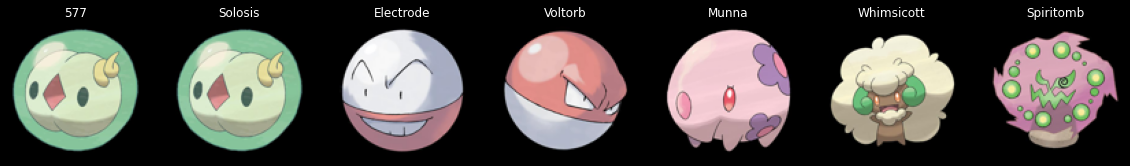

In [51]:
from scipy.spatial import distance
plt.style.use("dark_background")

def get_closest_poke(image_path, metric = "euclidean"):
    '''Returns the indices of six closest pokemon based on the chosen metric'''
    test_image = get_image(image_path)

    # Get the colour features from our image.
    test_features = create_features(test_image)
    
    # Scale our image, pass it through the PCA model that we trained.
    # NOTE: we only transform this time, not fit_transform - we want the new data to go through the same transformation as the old data.
    test_scaled = scaler.transform(test_features.reshape(1,-1))
    test_pca = pca.transform(test_scaled)
    
    # Compare our test image to our Pokemon image database.
    compare = distance.cdist(test_pca, pca_matrix.iloc[:,1:], metric = metric)

#     # Less computationally expensive way to find the six closest pokemon. Note that this are not necessarily sorted.
#     final = np.argpartition(compare[-1,:], kth = 5)
    
    # compare is a list in a list, hence the -1.
    # final contains the indexes of the closest 6 pokemon.
    final = np.argsort(compare[-1])
    return final[:6]

def display_closest_images(img_path, metric = "euclidean"):
    fig, axes = plt.subplots(1, 7, figsize = (20,5))
       
    try:
        closest_pokemon = get_closest_poke(img_path, metric = metric)
    except:
        im1 = Image.open(img_path + ".png")
        im1 = im1.convert('RGB')
        im1.save(img_path + ".jpg")
        closest_pokemon = get_closest_poke(img_path, metric = metric)
    
    print(closest_pokemon)
    
    titles = [img_path] + [feature_df.iloc[i]["name"] for i in closest_pokemon]
    
    axes = axes.ravel()
    
    for i, ax in enumerate(axes):
        if i == 0:
            ax.imshow(get_image(img_path))
            ax.set_title(titles[i])
        else:
            ax.imshow(get_image(closest_pokemon[i-1] + 1))
            ax.set_title(titles[i])
        ax.axis("off")
    
# Find and plot the six closest Pokemon!
display_closest_images("577")

In [35]:
from scipy.spatial import distance

test_image = get_image("779")

# Get the colour features from our image.
test_features = create_features(test_image)

# Scale our image, pass it through the PCA model that we trained.
# NOTE: we only transform this time, not fit_transform - we want the new data to go through the same transformation as the old data.
test_scaled = scaler.transform(test_features.reshape(1,-1))
test_pca = pca.transform(test_scaled)

# Compare our test image to our Pokemon image database.
compare = distance.cdist(test_pca, pca_matrix.iloc[:,1:])

final = np.argsort(compare[-1])

final

array([778,  74,  88, 368, 231, 770, 461, 412, 736, 692, 870, 843, 434,
       836, 569, 793, 484, 735, 166, 436, 545, 542, 463, 766,  80, 631,
       380, 852, 526, 628, 725, 674, 839, 396, 219, 557, 561, 824, 820,
       476, 550, 225, 822, 837, 845, 429, 578, 662, 838, 745,  92, 724,
       847, 617, 263, 563, 821, 238, 600, 524, 773, 819, 700, 884, 328,
       798, 733, 691, 433, 894, 448, 607, 411, 395, 663, 871, 823, 860,
       203,  73, 267, 862, 749, 731, 314, 417, 818, 268, 877, 789, 726,
       447, 154,   2, 451, 520, 611, 373, 876, 858, 603, 162, 289, 740,
       170, 608, 394, 634, 757, 375, 840, 523, 549, 849, 867, 397, 771,
       216, 393, 878, 841, 527, 245,  87, 869, 636, 859, 848, 831, 199,
       596, 629, 570, 694, 609, 543, 381, 853, 262, 458, 540, 780, 756,
       414, 696, 196, 586, 165, 825, 492, 355, 707, 145, 192, 595, 832,
       338, 882,  25, 385, 638, 319, 353, 885, 168, 657, 787, 708, 775,
       435, 475, 141, 352, 382, 594, 833, 690, 643, 129, 467, 84